In [13]:
!pip install arch
import pandas as pd
from arch import arch_model
from arch.univariate import ConstantMean, GARCH, Normal
df=pd.read_csv("C:/Users/SCIENCE/Documents/time3.csv", parse_dates=True, index_col=[0])
df

,Units Sold,Total Revenue
Order Date,,
2015-08-31,3604,2408445.08
2010-11-20,8435,2153286.80
2017-06-22,4848,2045322.72
2012-02-28,7225,3048155.25
2010-08-12,1975,406257.50
...,...,...
2010-11-16,39,363.87
2013-12-14,8856,1351248.48
2010-02-18,261,2435.13


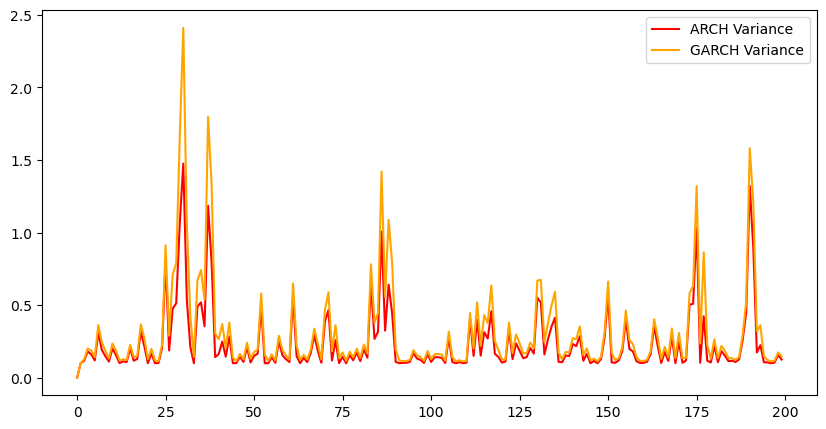

In [7]:
import matplotlib.pyplot as plt
import numpy as np
def simulate_GARCH(n, omega, alpha, beta = 0):
    np.random.seed(4)
    # Initialize the parameters
    white_noise = np.random.normal(size = n)
    resid = np.zeros_like(white_noise)
    variance = np.zeros_like(white_noise)
    
    for t in range(1, n):
        # Simulate the variance (sigma squared)
        variance[t] = omega + alpha * resid[t-1]**2 + beta * variance[t-1]
        # Simulate the residuals
        resid[t] = np.sqrt(variance[t]) * white_noise[t]    
    
    return resid, variance
# Simulate a ARCH(1) series
arch_resid, arch_variance = simulate_GARCH(n= 200, 
                                           omega = 0.1, alpha = 0.7)
# Simulate a GARCH(1,1) series
garch_resid, garch_variance = simulate_GARCH(n= 200, 
                                             omega = 0.1, alpha = 0.7, 
                                             beta = 0.1)

# Plot the ARCH variance
plt.figure(figsize=(10,5))
plt.plot(arch_variance, color = 'red', label = 'ARCH Variance')

# Plot the GARCH variance
plt.plot(garch_variance, color = 'orange', label = 'GARCH Variance')
plt.legend()
plt.show()

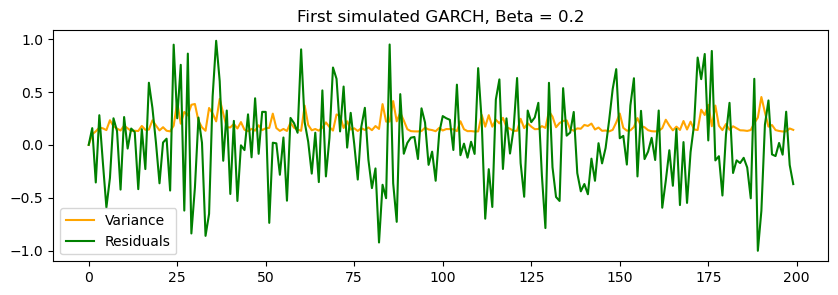

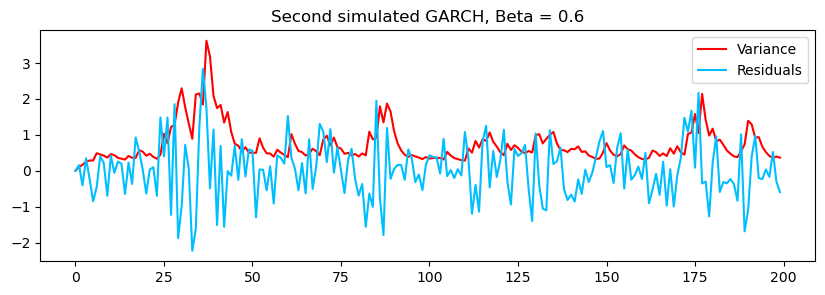

In [8]:
# First simulated GARCH
plt.figure(figsize=(10,3))
sim_resid, sim_variance = simulate_GARCH(n = 200,  omega = 0.1, alpha = 0.3, beta = 0.2)
plt.plot(sim_variance, color = 'orange', label = 'Variance')
plt.plot(sim_resid, color = 'green', label = 'Residuals')
plt.title('First simulated GARCH, Beta = 0.2')
plt.legend(loc='best')
plt.show()

# Second simulated GARCH
plt.figure(figsize=(10,3))
sim_resid, sim_variance = simulate_GARCH(n = 200,  omega = 0.1, alpha = 0.3, beta = 0.6)
plt.plot(sim_variance, color = 'red', label = 'Variance')
plt.plot(sim_resid, color = 'deepskyblue', label = 'Residuals')
plt.title('Second simulated GARCH, Beta = 0.6')
plt.legend(loc='best')
plt.show()

In [18]:
# Specify GARCH model assumptions
basic_gm = arch_model(df['Units Sold'], p = 1, q = 1,
                      mean = 'constant', vol = 'GARCH', dist = 'normal', rescale=False)
# Fit the model
gm_result = basic_gm.fit(update_freq = 4)

Iteration:      4,   Func. Count:     24,   Neg. LLF: 4688.71111000014
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4688.71111000014
            Iterations: 5
            Function evaluations: 28
            Gradient evaluations: 5


In [19]:
# Display model fitting summary
print(gm_result.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:             Units Sold   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -4688.71
Distribution:                  Normal   AIC:                           9385.42
Method:            Maximum Likelihood   BIC:                           9402.27
                                        No. Observations:                  499
Date:                Sat, Apr 13 2024   Df Residuals:                      498
Time:                        23:36:36   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu          5097.3208    131.254     38.836      0.000 [4.

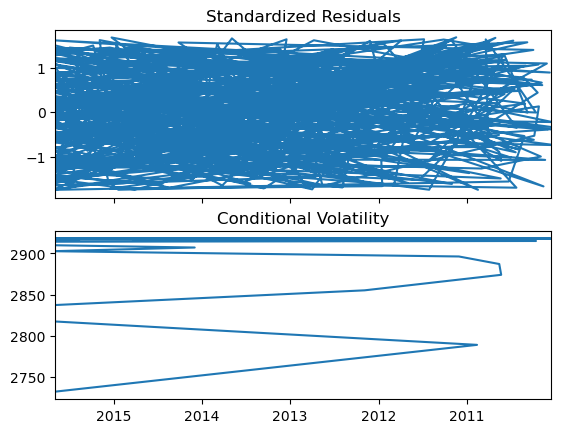

In [20]:
# Plot fitted results
gm_result.plot()
plt.show()

In [21]:
# Make 5-period ahead forecast
gm_forecast = gm_result.forecast(horizon = 5)

# Print the forecast variance
print(gm_forecast.variance[-1:])

                     h.1           h.2           h.3           h.4  \
Order Date                                                           
2010-01-17  8.512624e+06  8.512624e+06  8.512624e+06  8.512624e+06   

                     h.5  
Order Date                
2010-01-17  8.512624e+06  


C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_18304\2096183723.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gm_std_resid, norm_hist=True, fit=stats.norm, bins=50, color='r')
C:\Users\SCIENCE\Desktop\anaco\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


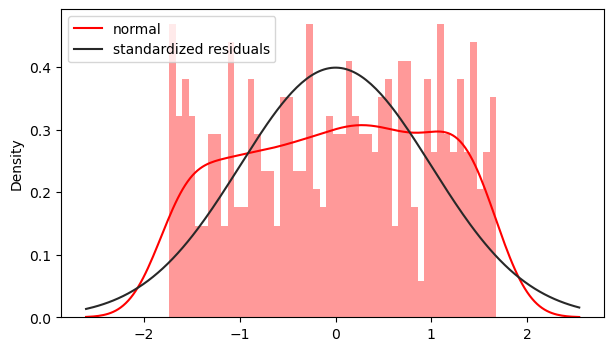

In [23]:
# Obtain model estimated residuals and volatility
import seaborn as sns
from scipy import stats
gm_resid = gm_result.resid
gm_std = gm_result.conditional_volatility

# Calculate the standardized residuals
gm_std_resid = gm_resid /gm_std

# Plot the histogram of the standardized residuals
plt.figure(figsize=(7,4))
sns.distplot(gm_std_resid, norm_hist=True, fit=stats.norm, bins=50, color='r')
plt.legend(('normal', 'standardized residuals'))
plt.show()

C:\Users\SCIENCE\Desktop\anaco\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 8.494e+06. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.01 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


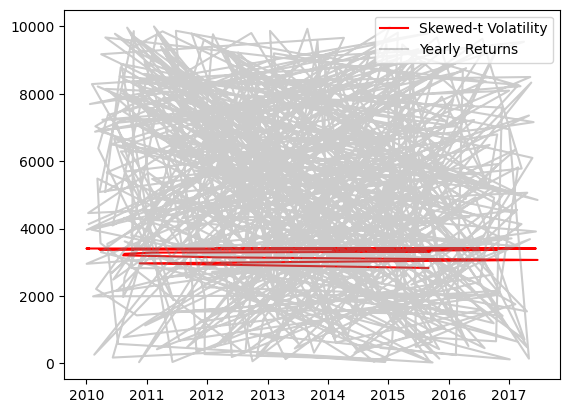

In [28]:
# Specify GARCH model assumptions
skewt_gm = arch_model(df['Units Sold'], p = 1, q = 1, mean = 'constant', vol = 'GARCH', dist = 'skewt')

# Fit the model
skewt_result = skewt_gm.fit(disp = 'off')

# Get model estimated volatility
skewt_vol = skewt_result.conditional_volatility
# Plot model fitting results
plt.plot(skewt_vol, color = 'red', label = 'Skewed-t Volatility')
plt.plot(df['Units Sold'], color = 'grey', 
         label = 'Yearly Returns', alpha = 0.4)
plt.legend(loc = 'upper right')
plt.show()

In [33]:
import pmdarima as pm

model = pm.auto_arima(df['Units Sold'],

d=0, # non-seasonal difference order
start_p=1, # initial guess for p
start_q=1, # initial guess for q
max_p=4, # max value of p to test
max_q=4, # max value of q to test                        
                    
seasonal=False, # is the time series seasonal
                    
information_criterion='bic', # used to select best model
trace=True, # print results whilst training
error_action='ignore', # ignore orders that don't work
stepwise=True, # apply intelligent order search
                        
)


Performing stepwise search to minimize bic
 ARIMA(1,0,1)(0,0,0)[0]             : BIC=inf, Time=2.27 sec
 ARIMA(0,0,0)(0,0,0)[0]             : BIC=10082.851, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : BIC=9640.257, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : BIC=9904.970, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0]             : BIC=9552.576, Time=0.22 sec
 ARIMA(3,0,0)(0,0,0)[0]             : BIC=9523.148, Time=0.14 sec
 ARIMA(4,0,0)(0,0,0)[0]             : BIC=9508.485, Time=0.22 sec
 ARIMA(4,0,1)(0,0,0)[0]             : BIC=inf, Time=1.78 sec
 ARIMA(3,0,1)(0,0,0)[0]             : BIC=inf, Time=1.81 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : BIC=9411.714, Time=0.47 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : BIC=9405.628, Time=0.28 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : BIC=9399.466, Time=0.19 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : BIC=9393.789, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : BIC=9389.994, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : BIC=9394.

In [34]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  499
Model:                        SARIMAX   Log Likelihood               -4688.784
Date:                Sun, 14 Apr 2024   AIC                           9381.569
Time:                        00:04:27   BIC                           9389.994
Sample:                             0   HQIC                          9384.875
                                - 499                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   5097.3206    131.066     38.891      0.000    4840.436    5354.205
sigma2      8.494e+06   8.39e+05     10.129      0.000    6.85e+06    1.01e+07
Ljung-Box (L1) (Q):                   2.43   Jarque-

C:\Users\SCIENCE\Desktop\anaco\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\SCIENCE\Desktop\anaco\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\SCIENCE\Desktop\anaco\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\SCIENCE\Desktop\anaco\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


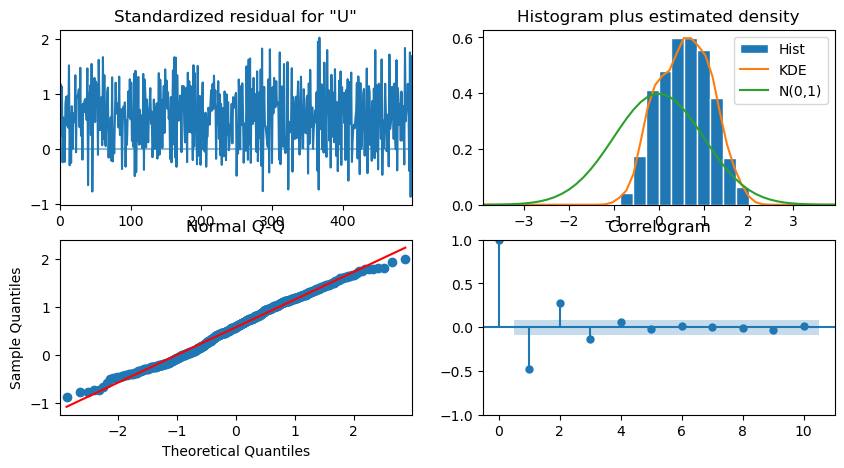

In [37]:
# Fit best model
import statsmodels.api as sm
import statsmodels.tsa.api as tsa
_arma_model = sm.tsa.SARIMAX(endog=df['Units Sold'],order=(0, 0, 1))
_model_result = _arma_model.fit()
# Plot model residuals
_model_result.plot_diagnostics(figsize=(10, 5))
plt.show()